# Justin Butler
## AAE 439 - HW 7

File created in Jupyter Notebook and formatted using \LaTeX

In [3]:
%%javascript
// Making sure the outputs display correctly
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [7]:
# Importing required packages for this homework
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import subprocess
import shutil
import sympy as sym

%matplotlib inline

## 5.20
The question was solved using NASA CEA online. This was done using ratios between 1 and 2 in increments of 0.05. I downloaded the .html file and input it line by line. You will see that in code file 1 below, I then searched for the molar masses, temperatures, and Isp values and converted them to float values to input into the graphs.

## 5.27
Code file 2 is the location for the scripts created for this problem.

### a)
The code below presents my method for determining the chamber temperature using $K_p$. This process had me following the procedure laid out in class - guessing a $T_c$ and iterating.

To find where $Q_12$ was zero, I utilized a trapezoid method of numerical integration to find $\int Cp dT$ for the enthalpy terms.

Equilibrium composition:
$$ N_2H_4 \to 0.998 N_2 + 1.994 H_2 + 0.004 NH_3$$

Chamber Temperature:
$$T_c = 870.4 \text{ K}$$

### b)
The resulting $c^*$ of the decomposition gases was found using the equation given in chapter 4 of the text.

$$c^* = 1004.532 \text{ m/s}$$

## 5.28
The calculations are given in Code file 3 below which come from the CEA output file. As teh gasses expand out of the nozzle, more ammonia will most likely form as the enthalpy of formation for ammonia is negative while the enthalpy of formations for both $N_2$ and $H_2$ are zero.

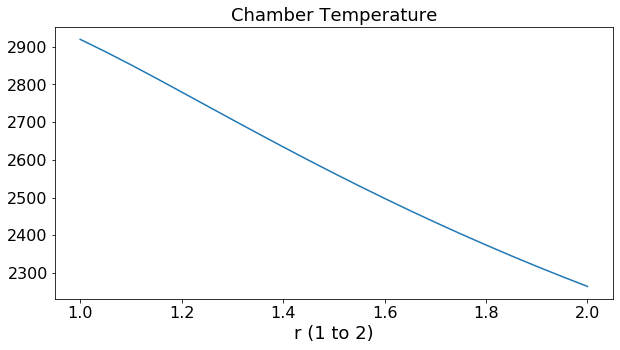

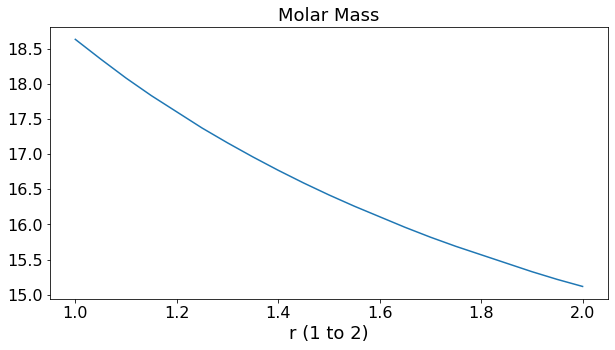

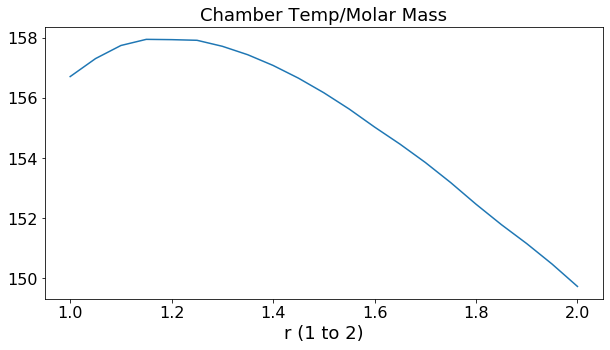

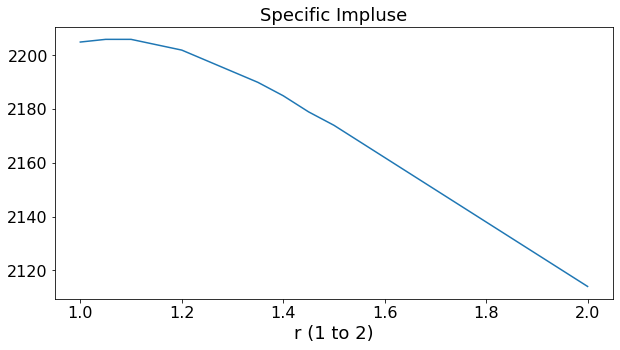

In [26]:
##############################
#####    CODE FILE 1    ######
##############################

## IMPORT CEA OUTPUT ##
cwd = os.getcwd()
file_path = os.path.join(cwd, 'ceaOutput.txt')
ceaFile = open(file_path, 'r')
lines = []
i = 0
for line in ceaFile:
    if i == 0 or i==1:
        i=i+1
    else:
        lines.append([line])
temp = []
mol = []
Isp = []
for line in lines:
    #print(line)
    tCheck = line[0].startswith(' T, K')
    iCheck = line[0].startswith(' Ivac,')
    mCheck = line[0].startswith(' M,')
    if tCheck:
        temp.append(line[0])
    if iCheck:
        Isp.append(line[0])
    if mCheck:
        mol.append(line[0])

temp = [float(item[18:-11]) for item in temp]
mol = [float(item[19:-11]) for item in mol]
Isp = [float(item[28:-2]) for item in Isp]
r = np.linspace(1,2,len(temp))

####### PLOT ########
def plot(x,y,title):
    plt.figure(figsize=(10,5))
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    #
    plt.plot(x,y,'-')
    #
    plt.title(title, fontsize=18)
    #plt.xlim(0,0.05)
    #plt.ylim(0,0.1)
    plt.xlabel('r (1 to 2)',fontsize=18)
    #plt.legend(loc=2, fontsize=16)
    #
    #plt.savefig('figure')
    #
    plt.show()
    plt.close()
    return(None)
titles = ['Chamber Temperature','Molar Mass',
          'Chamber Temp/Molar Mass', "Specific Impluse"]
ys = [temp,mol,[temp[i]/mol[i] for i in range(len(temp))],Isp]
for i in range(4):
    plot(r,ys[i],titles[i])


## 5.27
Hydrazine ($N_2H_4$) is a monopropleeant commmonly used in space propulsion application. This fluid decomposes into nitrogen gas, hydrogen gas, and ammonia ($NH_3$) depending on the pressure level. Assuming the hydrazine enters the reaction at room temperature and a decomposition at 10 atmospheres, determine:

### a)
The code below presents my method for determining the chamber temperature using $K_p$. This process had me following the procedure laid out in class - guessing a $T_c$ and iterating.

To find where $Q_12$ was zero, I utilized a trapezoid method of numerical integration to find $\int Cp dT$ for the enthalpy terms.

Equilibrium composition:
$$ N_2H_4 \to 0.998 N_2 + 1.994 H_2 + 0.004 NH_3$$

Chamber Temperature:
$$T_c = 870.4 \text{ K}$$

### b)
The resulting $c^*$ of the decomposition gases was found using the equation given in chapter 4 of the text.

$$c^* = 1004.532 \text{ m/s}$$

In [29]:
##############################
#####    CODE FILE 2    ######
##############################


# rounding function #
def rounds(number):
    trunc = float('%.3f'% (number * 1000/1000))
    return(trunc)
#Kp_16
def Kp16(T):
    if T>=600 and T<=2000:
        Kp = 10**(1.0847*10**(-12) * T**4 -7.015*10**(-9)*T**3 +
          1.7592*10**(-5)*T**2 - 2.14*10**(-2)*T + 6.4824)
    elif T>2000:
        Kp = 10**(-4.4574*10**(-11)*2000**(3)+5.2571*10**(-7)*2000**(2)
              -2.2*10**(-3)*2000 -1.9461)
    else:
        print("Invalid Temperature. Give something larger than 600K")
        Kp = False
    return Kp
#Solving for #mols from Kp
def molSolver(Kp):
    # First c
    c1 = 0
    KpTest = 0
    while KpTest < Kp:
        KpTest = (c1 / (
                 ((2-c1)/2)**(1/2) *
                 ((4-3*c1)/2)**(3/2))
                 )
        c1+=0.0001
        if c1 > 10:
            c1 = 'null'
            break
    # Second c (possibly)
    c2 = 1
    KpTest = 1
    while KpTest > Kp:
        KpTest = (c2 / (
                 ((2-c2)/2)**(1/2) *
                 ((4-3*c2)/2)**(3/2))
                 )
        c2-=0.0001
        if c2 < 0:
            c2 = 'null'
            break
    try:
        if np.abs(c1-c2) < 0.01:
            return rounds(c1)
        else:
            return [rounds(c1),rounds(c2)]
    except:
        if type(c1)!='string':
            return(c1)
        elif type(c2)!='string':
            return(c2)
        else:
            return(0)
# Cp Equations as given in the book
def CpSolver(T):
    cpN = 27.336+6.23*(T/1000)-0.95082*(T/1000)*2
    cpH = 26.896+4.3501*(T/1000)-0.32674*(T/1000)**2
    cpAm = 27.578+25.665*(T/1000)+9.9072*(T/1000)**2-6.6909*(T/1000)**3
    return([cpN,cpH,cpAm])
# Trapezoid method for Approximate Integral
def Trapezoid(data):
    #Assuming evenly spaced points
    delX = np.abs(data[0][0]-data[1][0])
    yVal = [item[1] for item in data]
    trap = (delX/2)*(data[0][1]+data[-1][1] +
                    sum(2*yVal[1:-1]))
    return(trap)

T = np.linspace(600,4000,2000)       
Kp = [Kp16(item) for item in T]
c = [molSolver(item) for item in Kp]


In [30]:
Q12 = []
for i in range(len(c)):
    a = (2-c[i])/2
    b = (4-3*c[i])/2
    tRange = np.linspace(298,T[i],1000)
    cpVals = [CpSolver(item) for item in tRange]
    pointsN = [[tRange[i],cpVals[i][0]] for i in range(len(tRange))]
    intN = Trapezoid(pointsN)
    pointsH = [[tRange[i],cpVals[i][1]] for i in range(len(tRange))]
    intH = Trapezoid(pointsH)
    pointsAm = [[tRange[i],cpVals[i][2]] for i in range(len(tRange))]
    intAm = Trapezoid(pointsAm)
    # 2 -> 2B
    H2H2b = a*intN + b*intH + c[i]*intN
    delHb = (-11.04*4184 * c[i]) - (12.05 * 4184)
    Q12.append(H2H2b + delHb)
correct_Temp = []
for item in Q12:
    if np.abs(item)<50:
        correct_Temp.append(Q12.index(item))
print([T[i] for i in correct_Temp])

[870.4352176088044]


In [31]:
print([Q12[item] for item in correct_Temp])
print([c[item] for item in correct_Temp])

[-8.733924464031588]
[0.004]


In [32]:
T_c = T[correct_Temp[0]]
M_N2 = 14.0067 #g/mol
M_H2 = 2.01588 #g/mol
M_Am = 17.031 #g/mol
c_m = c[correct_Temp[0]]
a_m = (2-c_m)/2
b_m = (4-3*c_m)/2
print('a: ',a_m,', b: ',b_m,', c: ',c_m)
moles = sum([a_m,b_m,c_m])
totMass = a_m*M_N2 + b_m*M_H2 + c_m*M_Am
CpVal = CpSolver(T_c)
Cp_N2,Cp_H2,Cp_Am = CpVal[0],CpVal[1],CpVal[2]
g_N2= (Cp_N2/(Cp_N2-(8.134/M_N2)))
g_H2 = (Cp_H2/(Cp_H2-(8.134/M_H2)))
g_Am = (Cp_Am/(Cp_Am-(8.134/M_Am)))
# Mass Average of gamma values
gamma = (a_m/moles)*g_N2 + (b_m/moles)*g_H2 + (c_m/moles)*g_Am
cStar = np.sqrt((8314*T_c)/(gamma*totMass))*(2/(gamma+1))**((-gamma -1)/(2*(gamma-1)))
print(rounds(cStar)," m/s")


a:  0.998 , b:  1.994 , c:  0.004
1004.532  m/s


## 5.28
The calculations are given in a table below from the CEA output file. As teh gasses expand out of the nozzle, more ammonia will most likely form as the enthalpy of formation for ammonia is negative while the enthalpy of formations for both $N_2$ and $H_2$ are zero.

In [59]:
##############################
#####    CODE FILE 3    ######
##############################

## IMPORT CEA OUTPUT ##
cwd = os.getcwd()
file_path = os.path.join(cwd, 'ceaOutput7_3.txt')
ceaFile = open(file_path, 'r')
lines = []
i = 0
for line in ceaFile:
    if i > 47 and i < 74:
        i+=1
        lines.append([line])
    else:
        i+=1
for item in lines:
    print(item[0])

                 CHAMBER   THROAT

 Pinf/P            1.0000   1.8638

 P, BAR            10.133   5.4366

 T, K              873.44   743.91

 RHO, KG/CU M    1.4975 0 9.4753-1

 H, KJ/KG         1571.69  1183.44

 U, KJ/KG          895.05   609.68

 G, KJ/KG        -12205.6 -10550.6

 S, KJ/(KG)(K)    15.7735  15.7735



 M, (1/n)          10.733   10.780

 (dLV/dLP)t      -1.00471 -1.00895

 (dLV/dLT)p        1.0352   1.0769

 Cp, KJ/(KG)(K)    3.0566   3.3123

 GAMMAs            1.3641   1.3534

 SON VEL,M/SEC      960.7    881.2

 MACH NUMBER        0.000    1.000



 PERFORMANCE PARAMETERS



 Ae/At                      1.0000

 CSTAR, M/SEC               1213.5

 CF                         0.7261

 Ivac, M/SEC                1532.3

 Isp, M/SEC                  881.2



